<a href="https://colab.research.google.com/github/Nitin221206/My_project/blob/main/terrorist_attack_capston_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amidst the rising global threat of terrorism, this data analysis project seeks to examine and analyze the Global Terrorism Database (GTD) to identify patterns and trends in terrorist incidents worldwide. The primary objective is to understand the geographical distribution, frequency, and severity of terrorist attacks, with a focus on factors such as attack types, target locations, and perpetrating groups. By employing data wrangling concept, and data visualization, the project aims to provide actionable insights for policymakers and security agencies. The expected deliverables include a detailed report, visualizations, and recommendations for enhancing international efforts to combat terrorism.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Global Terrorism Data (2).csv", encoding='ISO-8859-1')

<ipython-input-4-b256e992d9ee>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Dataset/Global Terrorism Data (2).csv", encoding='ISO-8859-1')


#Taking info of dataframe

In [ ]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df.shape

(181691, 135)

In [ ]:
(df.isnull().sum()/(df.shape[0]) * 100)

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64

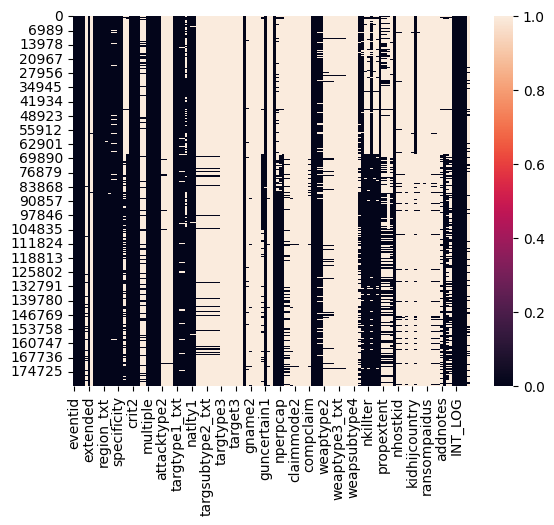

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


# cleaning the data


In [ ]:
# droping the columns do not use and not enough value
df.drop(columns = ["approxdate","resolution","location","alternative","alternative_txt","attacktype2","attacktype2_txt","attacktype3","attacktype3_txt","targtype2","targtype2_txt","targsubtype2","targsubtype2_txt","corp2","target2","natlty2","natlty2_txt","targtype3","targtype3_txt","targsubtype3","targsubtype3_txt","corp3","target3","natlty3","natlty3_txt","gsubname", "gname2","gsubname2","gname3","gsubname3","motive","guncertain3","guncertain2","claimmode","claimmode_txt","claim2","claimmode2","claimmode2_txt","claim3","claimmode3","claimmode3_txt","compclaim","weaptype2","weaptype2_txt","weapsubtype2","weapsubtype2_txt","weaptype3","weaptype3_txt","weapsubtype3","weapsubtype3_txt","weaptype4","weaptype4_txt","weapsubtype4","weapsubtype4_txt","propextent","propextent_txt","propvalue","propcomment","nhostkid","nhostkidus","nhours","ndays","divert","kidhijcountry","ransom","ransomamt","ransomamtus","ransompaid","ransompaidus","ransomnote","hostkidoutcome","hostkidoutcome_txt","nreleased","addnotes","scite2","scite3","related"], inplace = True)

In [ ]:
df['date'] = pd.to_datetime(df['iyear'].astype(str) + '-' + df['imonth'].astype(str) + '-' + df['iday'].astype(str), format='%Y-%m-%d', errors='coerce')
df.dropna(subset=['date'], inplace=True)

In [ ]:
df.select_dtypes(include = "object").columns

Index(['country_txt', 'region_txt', 'provstate', 'city', 'summary',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt',
       'weapdetail', 'scite1', 'dbsource'],
      dtype='object')

In [ ]:
for i in df.select_dtypes(include = "object").columns:
    df[i].fillna(df[i].mode()[0],inplace = True)

In [ ]:
df.select_dtypes(include = "float64").columns

Index(['latitude', 'longitude', 'specificity', 'doubtterr', 'multiple',
       'targsubtype1', 'natlty1', 'guncertain1', 'nperps', 'nperpcap',
       'claimed', 'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound',
       'nwoundus', 'nwoundte', 'ishostkid'],
      dtype='object')

In [ ]:
for i in df.select_dtypes(include = "float64").columns:
    df[i].fillna(df[i].mean(),inplace = True)

In [ ]:
df.select_dtypes(include = "int64").columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country', 'region',
       'vicinity', 'crit1', 'crit2', 'crit3', 'success', 'suicide',
       'attacktype1', 'targtype1', 'individual', 'weaptype1', 'property',
       'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [ ]:
for i in df.select_dtypes(include = "int64").columns:
    df[i].fillna(df[i].mean(),inplace = True)

In [ ]:
df.shape

(180800, 59)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180800 entries, 0 to 181690
Data columns (total 59 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   eventid           180800 non-null  int64         
 1   iyear             180800 non-null  int64         
 2   imonth            180800 non-null  int64         
 3   iday              180800 non-null  int64         
 4   extended          180800 non-null  int64         
 5   country           180800 non-null  int64         
 6   country_txt       180800 non-null  object        
 7   region            180800 non-null  int64         
 8   region_txt        180800 non-null  object        
 9   provstate         180800 non-null  object        
 10  city              180800 non-null  object        
 11  latitude          180800 non-null  float64       
 12  longitude         180800 non-null  float64       
 13  specificity       180800 non-null  float64       
 14  vicinity 

In [ ]:
df.drop_duplicates()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,date
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Baghdad,...,0.107442,0,0.0,Committee on Government Operations United Stat...,PGIS,0,0,0,0,1970-07-02
5,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,...,0.000000,1,0.0,"""Police Chief Quits,"" Washington Post, January...",Hewitt Project,-9,-9,0,-9,1970-01-01
6,197001020001,1970,1,2,0,218,Uruguay,3,South America,Montevideo,...,0.107442,0,0.0,Committee on Government Operations United Stat...,PGIS,0,0,0,0,1970-01-02
7,197001020002,1970,1,2,0,217,United States,1,North America,California,...,0.000000,1,0.0,Committee on Government Operations United Stat...,Hewitt Project,-9,-9,0,-9,1970-01-02
8,197001020003,1970,1,2,0,217,United States,1,North America,Wisconsin,...,0.000000,1,0.0,"Tom Bates, ""Rads: The 1970 Bombing of the Army...",Hewitt Project,0,0,0,0,1970-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.000000,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0,2017-12-31
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.000000,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1,2017-12-31
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.000000,1,0.0,"""Maguindanao clashes trap tribe members,"" Phil...",START Primary Collection,0,0,0,0,2017-12-31
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.000000,-9,0.0,"""Trader escapes grenade attack in Imphal,"" Bus...",START Primary Collection,-9,-9,0,-9,2017-12-31


# **TAKING INSIGHTS FROM THE DATA**

SOLVING QUESTIONS USING GRAPH

# 1- What is the overall trend in the number of terrorist incidents worldwide during the specified period?

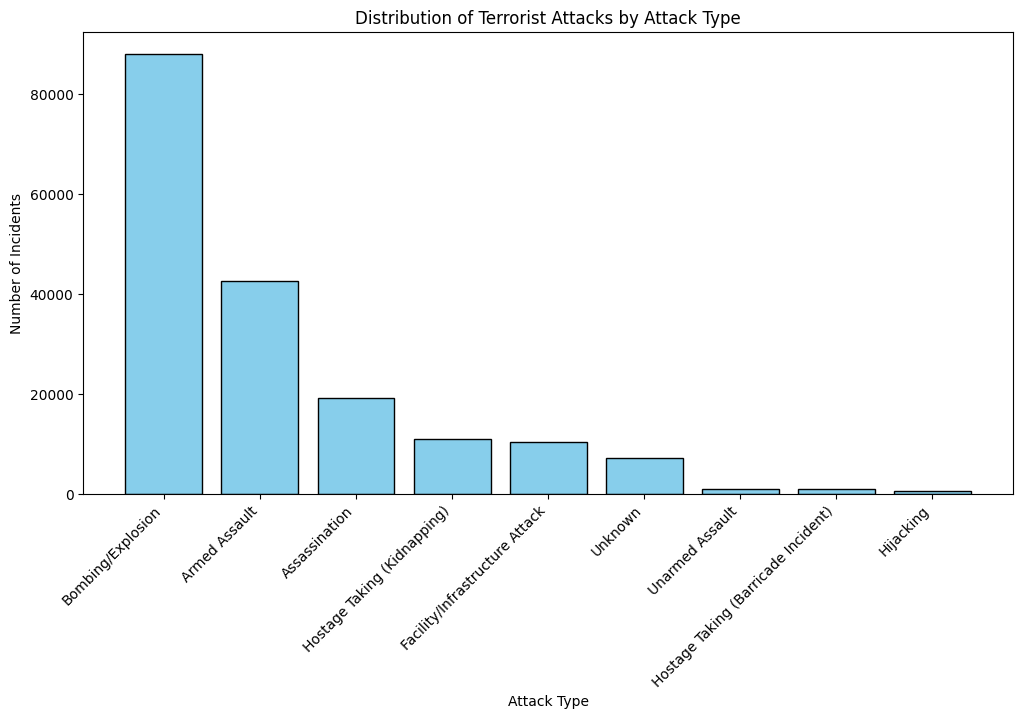

In [ ]:
attack_type_counts = df['attacktype1_txt'].value_counts()

# Plot a bar chart for the distribution of terrorist attacks by attack type
plt.figure(figsize=(12, 6))
plt.bar(attack_type_counts.index, attack_type_counts, color='skyblue', edgecolor='black')
plt.title('Distribution of Terrorist Attacks by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2- Which regions experienced the highest and lowest rates of terrorism between 1970 and 2017?

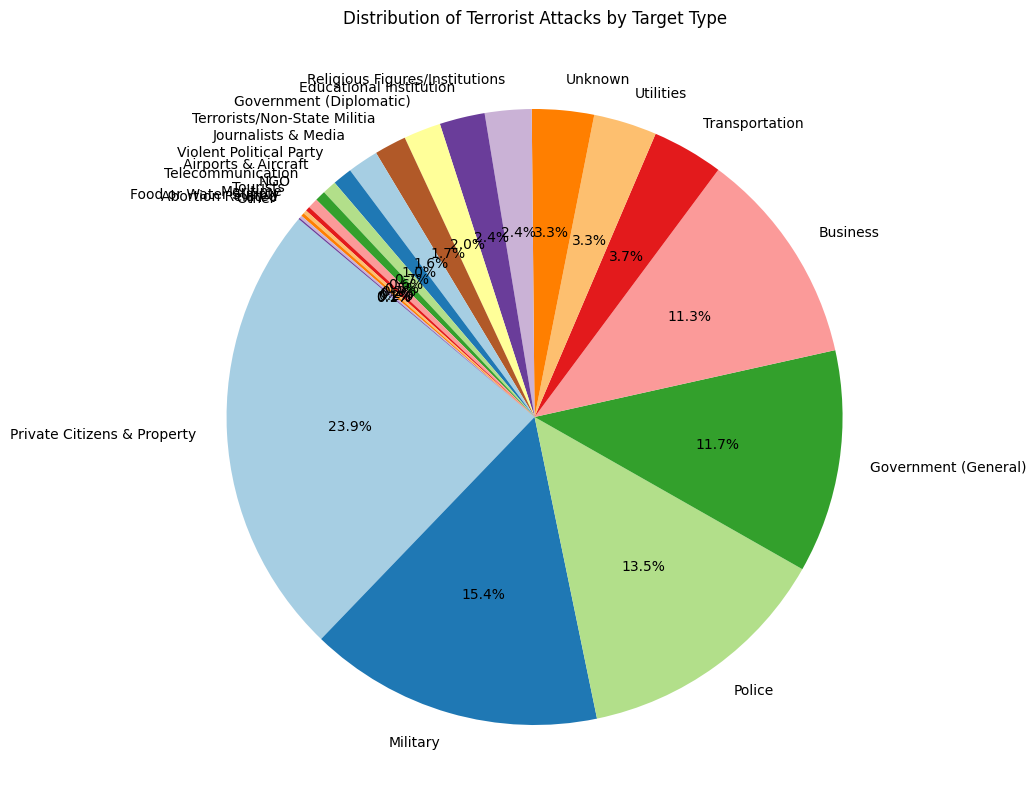

In [ ]:
target_type_counts = df['targtype1_txt'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(target_type_counts, labels=target_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Terrorist Attacks by Target Type')
plt.show()

# 3- Can you identify any significant spikes or declines in terrorist activity during specific years or decades?

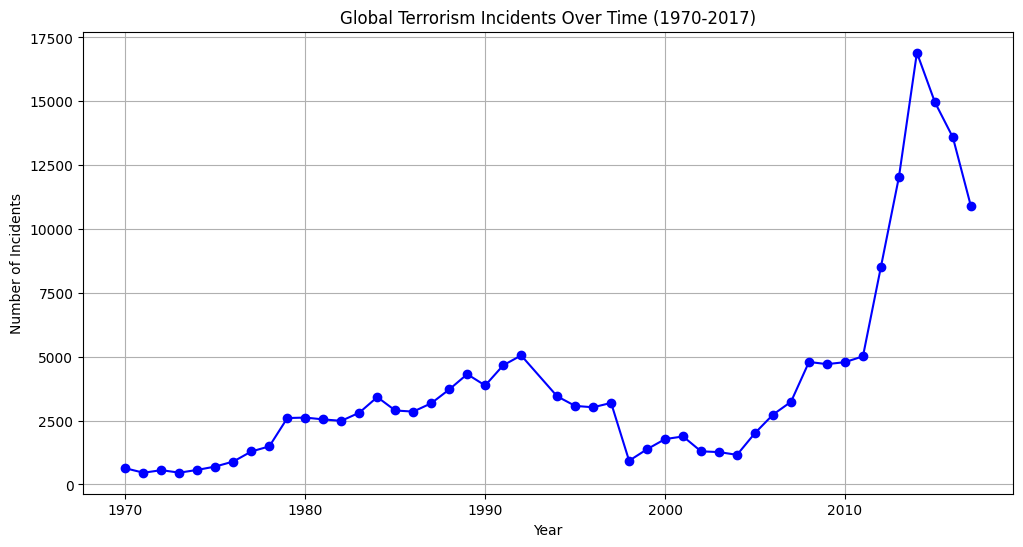

In [ ]:
incidents_per_year = df.groupby('iyear').size()

# Plot the trend over the years
plt.figure(figsize=(12, 6))
plt.plot(incidents_per_year, marker='o', linestyle='-', color='b')
plt.title('Global Terrorism Incidents Over Time (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# 4- What were the most common tactics used by terrorists during this time frame?

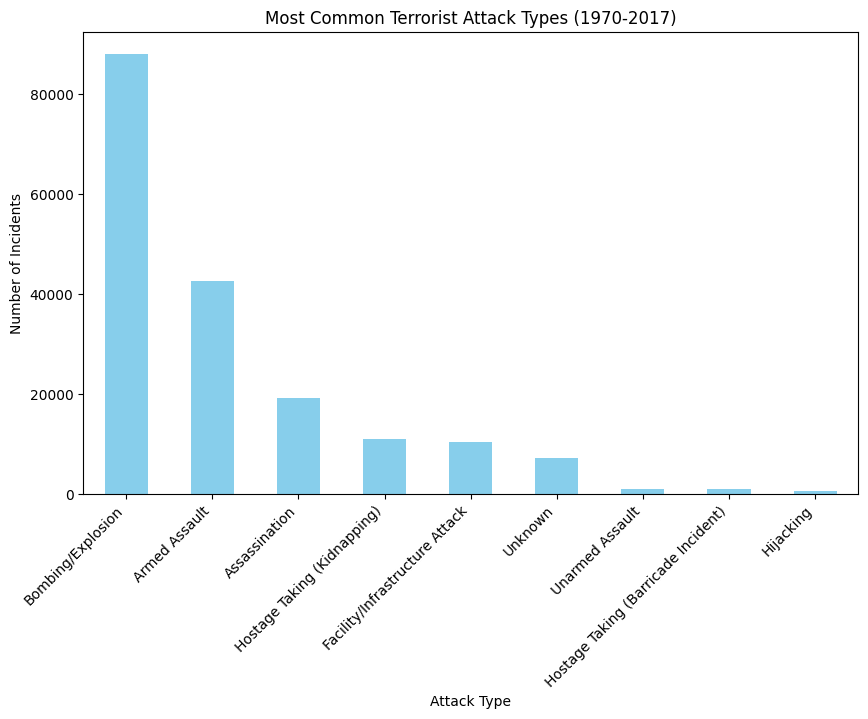

In [ ]:
attack_type_counts = df['attacktype1_txt'].value_counts()

# Plot the most common attack types
plt.figure(figsize=(10, 6))
attack_type_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Terrorist Attack Types (1970-2017)')
plt.xlabel('Attack Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# 5- Were there any notable shifts in the types of targets chosen by terrorists over the years?

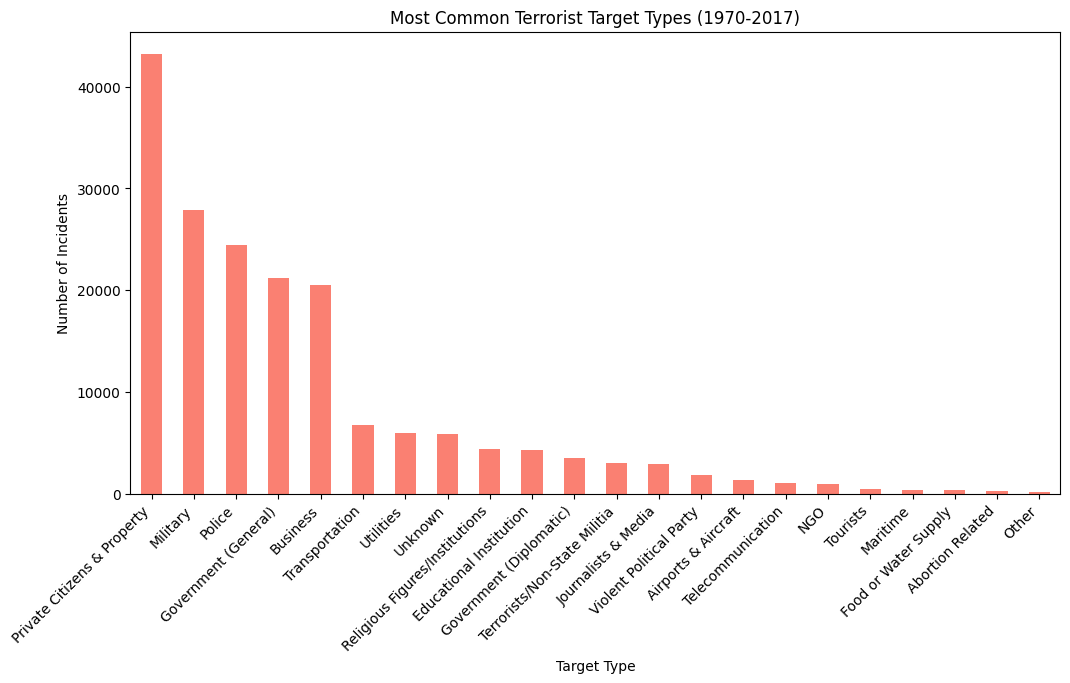

In [ ]:
# Group the data by target type and calculate the number of incidents for each type
target_type_counts = df['targtype1_txt'].value_counts()

# Plot the most common target types
plt.figure(figsize=(12, 6))
target_type_counts.plot(kind='bar', color='salmon')
plt.title('Most Common Terrorist Target Types (1970-2017)')
plt.xlabel('Target Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# 6- Which terrorist groups were the most active globally during the specified period?

<ipython-input-27-e253719e1b79>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=terrorist_group_counts.values, y=terrorist_group_counts.index, palette='viridis')


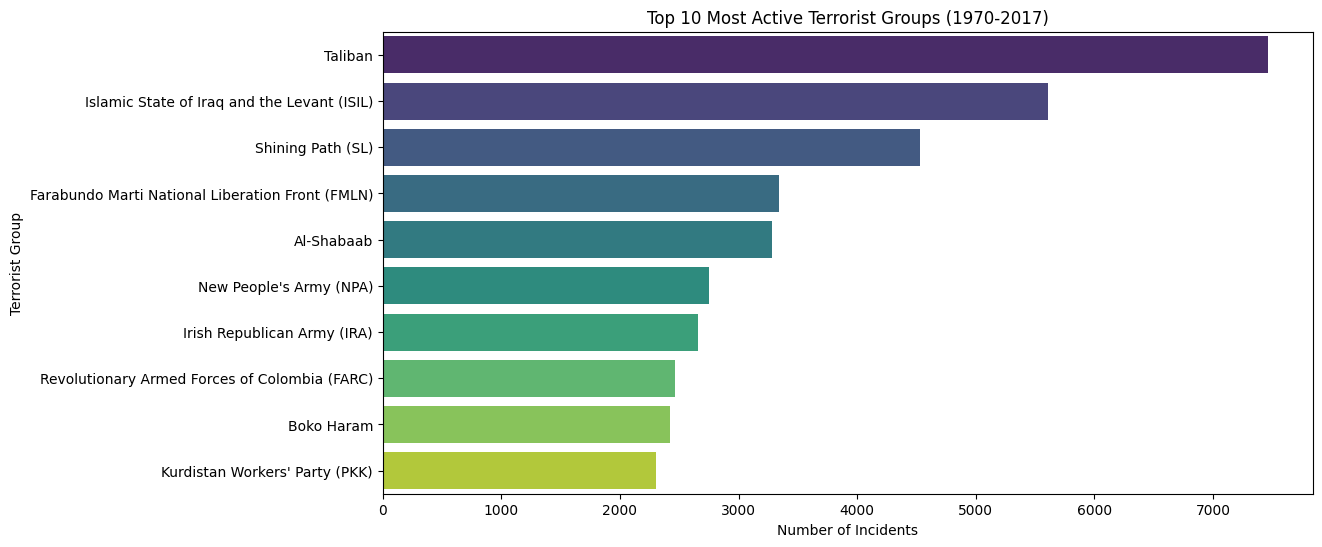

In [ ]:
terrorism_data_filtered = df[df['gname'] != 'Unknown']

# Group the data by terrorist group and calculate the number of incidents for each group
terrorist_group_counts = terrorism_data_filtered['gname'].value_counts().head(10)

# Plot the most active terrorist groups using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=terrorist_group_counts.values, y=terrorist_group_counts.index, palette='viridis')
plt.title('Top 10 Most Active Terrorist Groups (1970-2017)')
plt.xlabel('Number of Incidents')
plt.ylabel('Terrorist Group')
plt.show()

# 7- How has the lethality of terrorist incidents evolved over time?

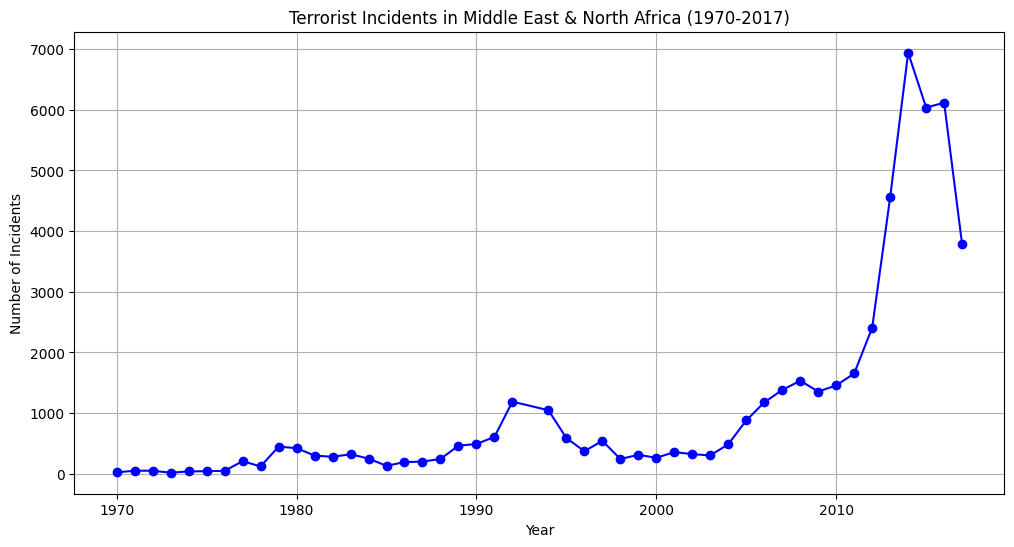

In [ ]:
# Choose a specific region (replace 'Middle East & North Africa' with your desired region)
selected_region = 'Middle East & North Africa'
region_data = df[df['region_txt'] == selected_region]

# Group the data by year and calculate the number of incidents in each year
incidents_per_year = region_data.groupby('iyear').size()

# Plot the trend over the years
plt.figure(figsize=(12, 6))
plt.plot(incidents_per_year, marker='o', linestyle='-', color='b')
plt.title(f'Terrorist Incidents in {selected_region} (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()






























































#8- Were there any changes in the demographics of individuals involved in terrorism, such as age, gender, or nationality?

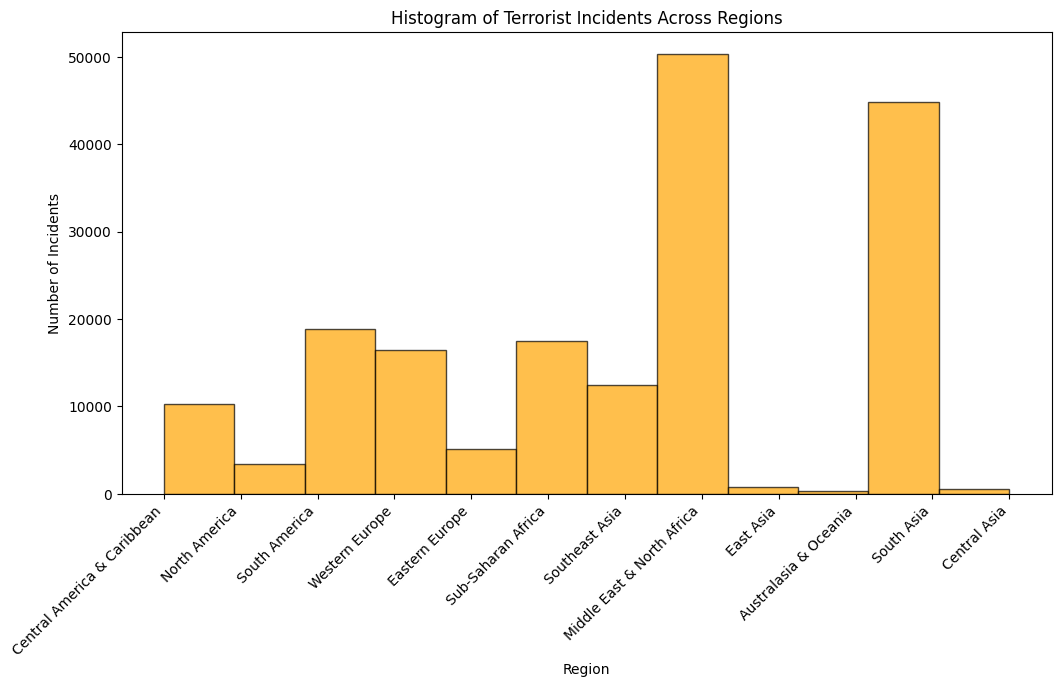

In [ ]:
region_counts = df['region_txt'].value_counts()

# Plot a histogram of the distribution of incidents across regions
plt.figure(figsize=(12, 6))
plt.hist(df['region_txt'], bins=len(region_counts), color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of Terrorist Incidents Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# 9- country having a highest attack

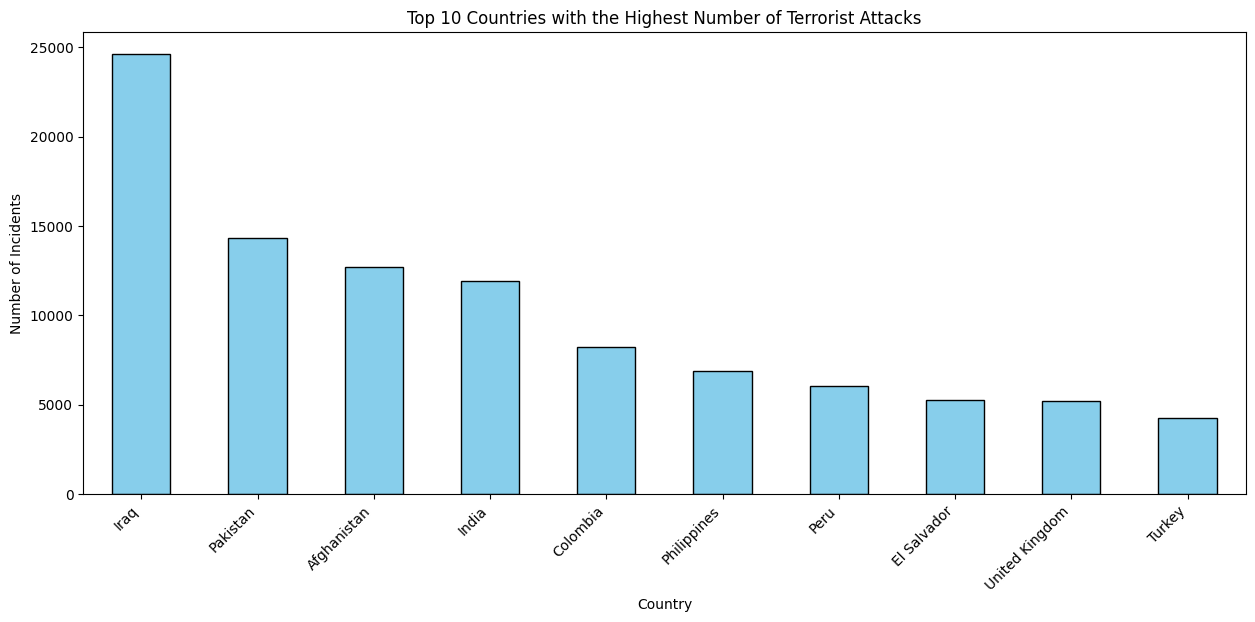

In [42]:
top_countries = df['country_txt'].value_counts().head(10)

# Plot a bar chart for the top 10 countries with the highest number of terrorist attacks
plt.figure(figsize=(15, 6))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Countries with the Highest Number of Terrorist Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# 10- top 10 citys which had a highest attack

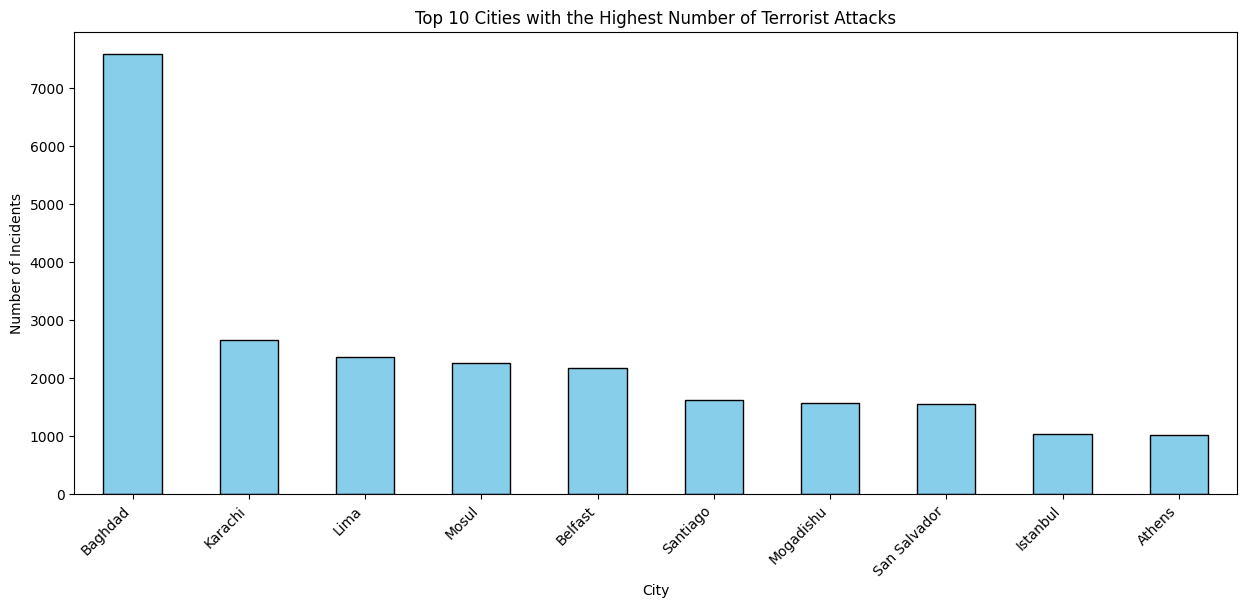

In [43]:
city = df["city"].value_counts()[1:11]

# Plot a bar chart for the top 10 cities with the highest number of terrorist attacks
plt.figure(figsize=(15, 6))
city.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Cities with the Highest Number of Terrorist Attacks')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

# 11 - terrorist attack over the year in Iraq

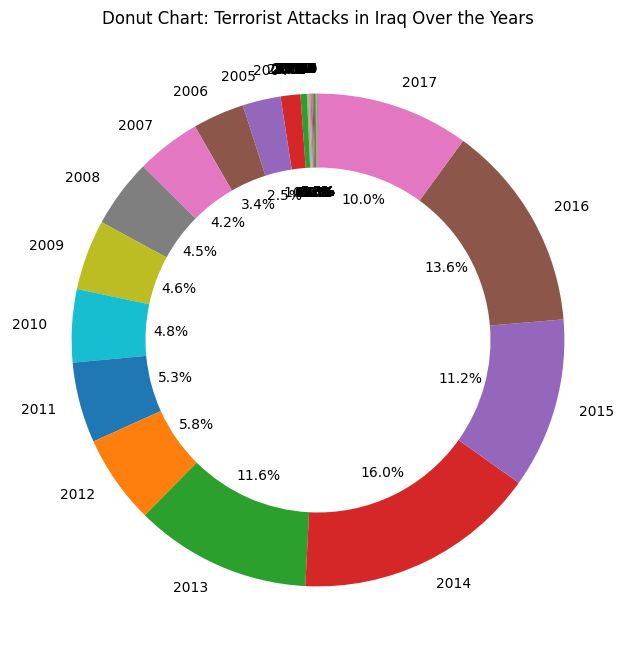

In [44]:
top_country = df['country_txt'].value_counts().idxmax()

# Filter the data for the top country
top_country_data = df[df['country_txt'] == top_country]

# Create a DataFrame with the count of incidents for each year in the top country
incident_counts = top_country_data.groupby('iyear').size().reset_index(name='Number of Incidents')

# Create a donut chart for the top country with the highest number of terrorist attacks
plt.figure(figsize=(8, 8))
plt.pie(incident_counts['Number of Incidents'], labels=incident_counts['iyear'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
plt.title(f'Donut Chart: Terrorist Attacks in {top_country} Over the Years')
plt.show()

# CONCLUSION

The Exploratory Data Analysis (EDA) of global terrorism data has revealed several key insights into the patterns and trends of terrorist activities worldwide. Our analysis indicated significant geographic and temporal variations in terrorist incidents, with certain regions, such as the Middle East & North africa and South Asia, experiencing higher frequencies of attacks. Temporal trends highlighted spikes in terrorist activities during specific periods, often linked to political unrest or conflicts. We also identified that certain groups were responsible for a majority of attacks. This comprehensive analysis underscores the importance of targeted counter-terrorism strategies and the need for continuous monitoring to mitigate future threats effectively.